# Optimizing Workforce Strategies through People Analytics

This project navigates through a detailed exploration of income patterns within an HR Analytics dataset. Focused on understanding employee demographics, job satisfaction, and work-related aspects, this analysis employs various data science techniques and visualizations to extract valuable insights.

## **Dataset:** <a href="https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset/data">HR Analytics Dataset</a>
The dataset provides information on various aspects of employees, such as demographics, job satisfaction, and work-related factors. 

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the HR Analytics Dataset
data = pd.read_csv('../Data Science Projects/HR_Analytics.csv')

In [3]:
# Transpose to take a look at the columns
data.head().T

,0,1,2,3,4
EmpID,RM297,RM302,RM458,RM728,RM829
Age,18,18,18,18,18
AgeGroup,18-25,18-25,18-25,18-25,18-25
Attrition,Yes,No,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Non-Travel,Non-Travel
DailyRate,230,812,1306,287,247
Department,Research & Development,Sales,Sales,Research & Development,Research & Development
DistanceFromHome,3,10,5,5,8
Education,3,3,3,2,1
EducationField,Life Sciences,Medical,Marketing,Life Sciences,Medical


In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
# Check for missing values
data.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

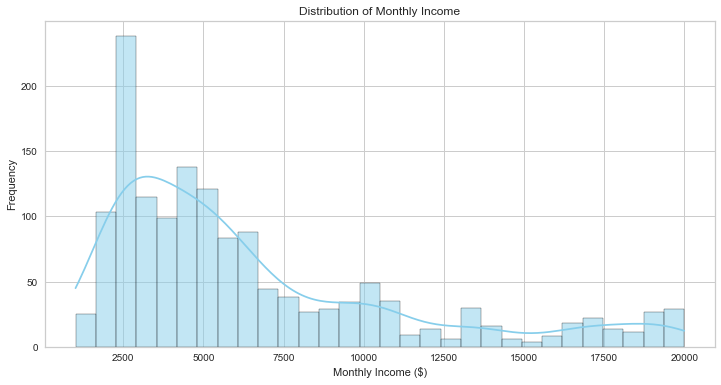

In [6]:
# Explore the distribution of Monthly Income
plt.figure(figsize=(12, 6))
sns.histplot(data['MonthlyIncome'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Frequency')
plt.show()

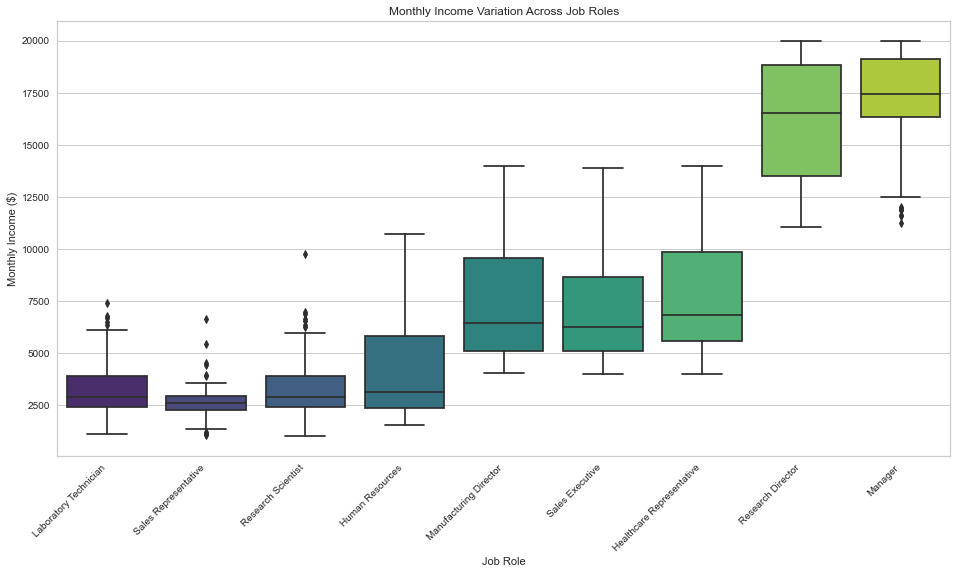

In [7]:
# Investigate Monthly Income by Job Role
plt.figure(figsize=(16, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=data, palette='viridis')
plt.title('Monthly Income Variation Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

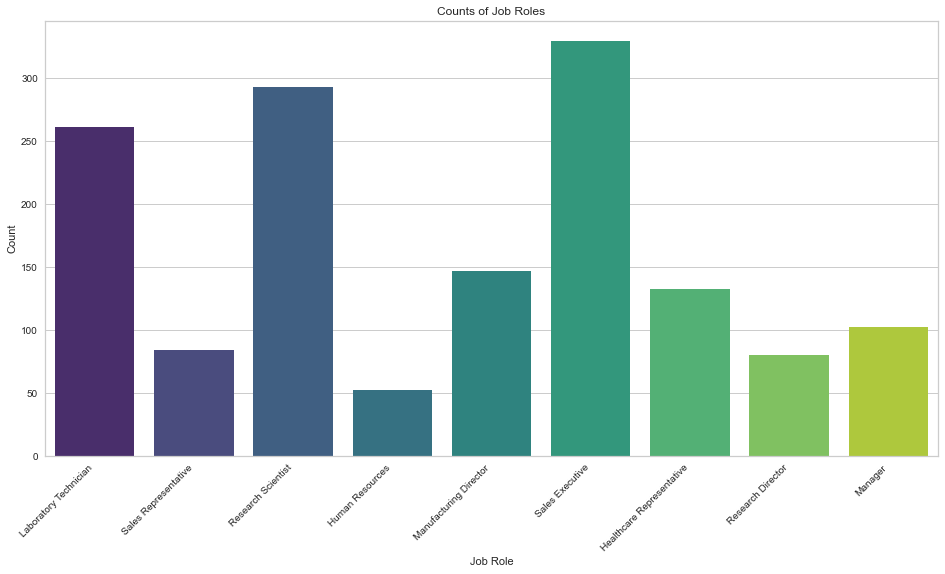

In [8]:
# Plot counts of Job Roles
plt.figure(figsize=(16, 8))
sns.countplot(x='JobRole', data=data, palette='viridis')
plt.title('Counts of Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

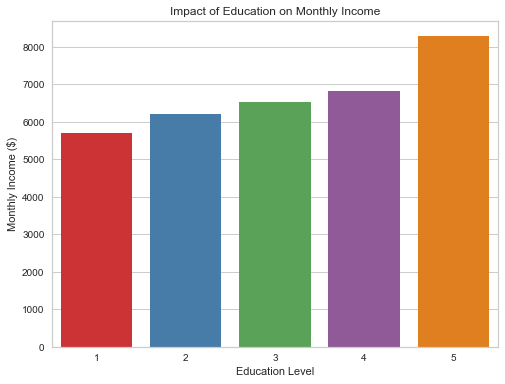

In [9]:
# Analyze the impact of Education on Monthly Income
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='MonthlyIncome', data=data, palette='Set1', ci=None)
plt.title('Impact of Education on Monthly Income')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income ($)')
plt.show()

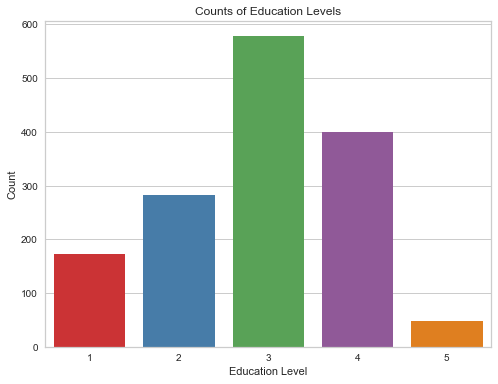

In [10]:
# Plot counts of Education Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data, palette='Set1')
plt.title('Counts of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

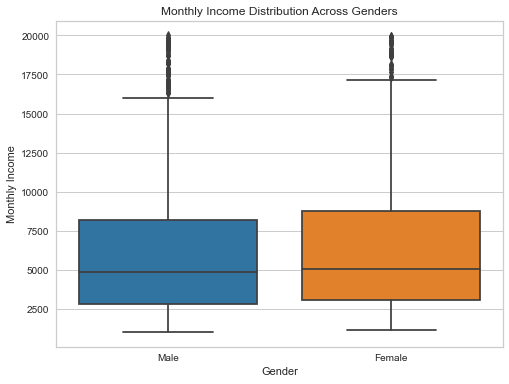

In [11]:
# Explore Monthly Income by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='MonthlyIncome', data=data, palette='tab10')
plt.title('Monthly Income Distribution Across Genders')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.show()

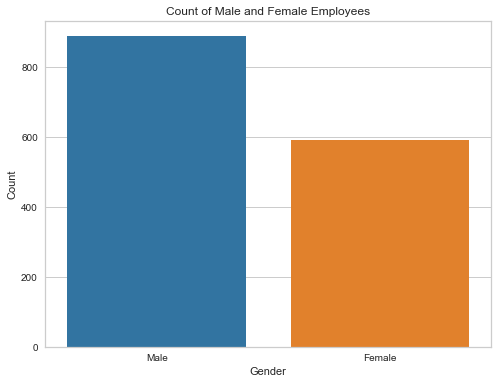

In [12]:
# Plot the counts of male and female employees at the company
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='tab10')
plt.title('Count of Male and Female Employees')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

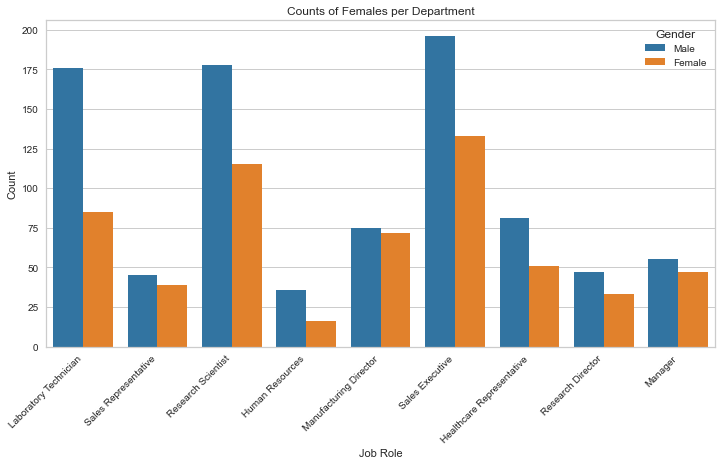

In [13]:
# Plot counts of Females per Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Gender', data=data, palette='tab10')
plt.title('Counts of Females per Department')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

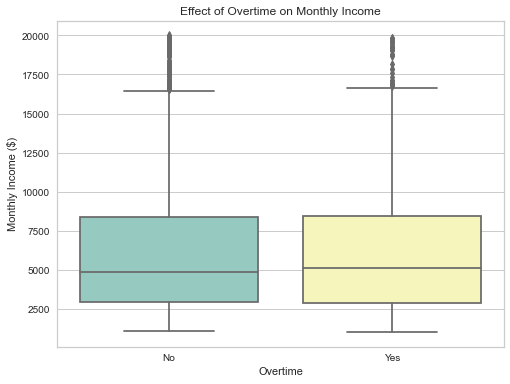

In [14]:
# Examine the effect of Overtime on Monthly Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverTime', y='MonthlyIncome', data=data, palette='Set3')
plt.title('Effect of Overtime on Monthly Income')
plt.xlabel('Overtime')
plt.ylabel('Monthly Income ($)')
plt.show()

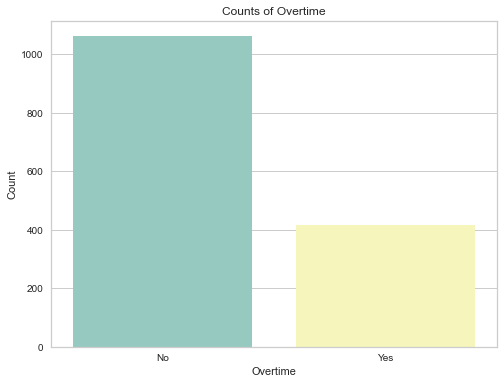

In [15]:
# Plot counts of Overtime
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', data=data, palette='Set3')
plt.title('Counts of Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

## Insights:
- Job roles significantly impact Monthly Income, with some roles having higher median incomes
- Education level influences Monthly Income, with higher education associated with higher incomes
- There is no noticeable difference in Monthly Income between genders
- Overtime work has very little impact on higher Monthly Income

In [16]:
# Data preprocessing
# Use LabelEncoder for specific categorical columns
label_columns = ['Attrition', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
label_encoder = LabelEncoder()

for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [17]:
# Select relevant columns for clustering
cluster_data = data[['Age', 'Attrition', 'Education', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 
                     'OverTime', 'PerformanceRating', 'TotalWorkingYears', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole']]

In [18]:
cluster_data.describe()

,Age,Attrition,Education,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,36.917568,0.160811,2.910811,0.600676,4.460135,2.725000,1.097973,6504.985811,0.282432,3.153378,11.281757,2.760811,7.009459,4.228378
std,9.128559,0.367481,1.023796,0.489925,2.462655,1.104137,0.729368,4700.261400,0.450335,0.360474,7.770870,0.707024,6.117945,3.616020
min,18.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1009.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2922.250000,0.000000,3.000000,6.000000,2.000000,3.000000,2.000000
50%,36.000000,0.000000,3.000000,1.000000,5.000000,3.000000,1.000000,4933.000000,0.000000,3.000000,10.000000,3.000000,5.000000,3.000000
75%,43.000000,0.000000,4.000000,1.000000,7.000000,4.000000,2.000000,8383.750000,1.000000,3.000000,15.000000,3.000000,9.000000,7.000000
max,60.000000,1.000000,5.000000,1.000000,8.000000,4.000000,2.000000,19999.000000,1.000000,4.000000,40.000000,4.000000,40.000000,18.000000


<AxesSubplot:>

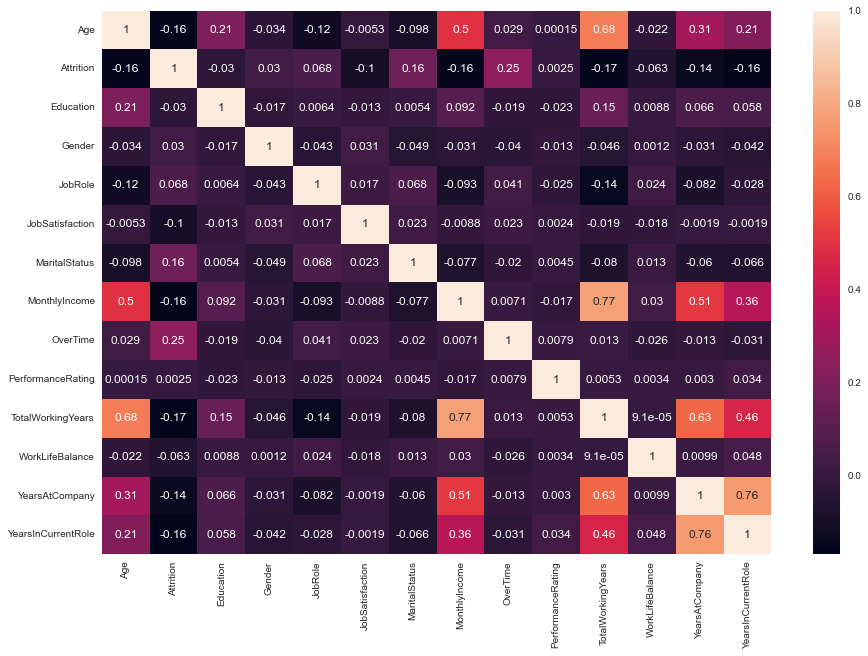

In [19]:
# Check correlation using heatmap
plt.figure(figsize=(15,10))
cor = cluster_data.corr() 
sns.heatmap(cor, annot = True) 

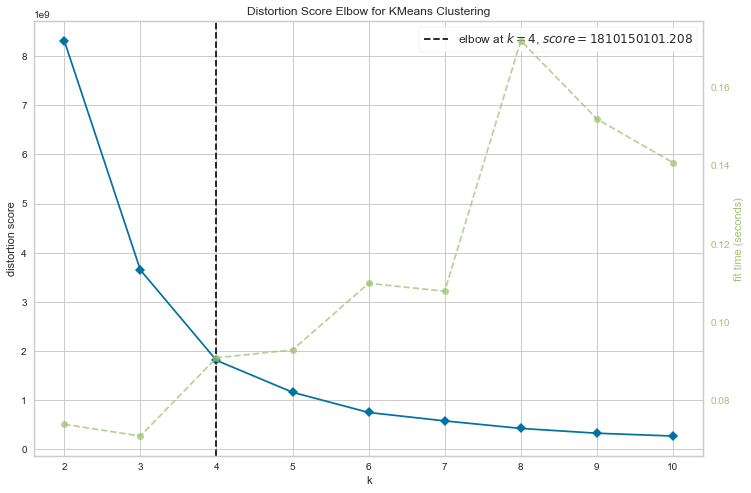

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Find the elbow
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(cluster_data)
elbow_graph.show()

## k = 4

In [21]:
# Based on the elbow method, K=4 for clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [22]:
# Fit the k-means model to the standardized data
kmeans.fit(cluster_data)

KMeans(n_clusters=4, random_state=0)

In [23]:
# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

In [33]:
# Looking at the mean features in each cluster
Cluster = data[['Age', 'Attrition', 'Education', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 
                'OverTime', 'PerformanceRating', 'TotalWorkingYears', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'Cluster']]
Cluster.groupby(['Cluster']).mean()

,Age,Attrition,Education,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
Cluster,,,,,,,,,,,,,,
0,40.831933,0.142857,2.974790,0.579832,4.394958,2.642857,1.021008,10805.617647,0.306723,3.155462,16.567227,2.768908,10.109244,5.932773
1,36.932271,0.111554,3.051793,0.577689,4.697211,2.764940,1.105578,5727.472112,0.278884,3.143426,10.581673,2.792829,6.918327,4.645418
2,47.434783,0.036232,3.094203,0.594203,3.724638,2.717391,0.985507,17938.115942,0.253623,3.152174,25.673913,2.818841,14.000000,6.449275
3,32.946844,0.237542,2.725914,0.629568,4.456811,2.725914,1.147841,2832.210963,0.282392,3.161130,6.476744,2.717608,4.257475,2.697674


## The mean of each feature provides insights into the characteristics of the employees in each cluster. This can help the organization tailor strategies to address specific needs and challenges associated with different employee segments. 

In [25]:
# Display the count of samples in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0    238
1    502
2    138
3    602
Name: Cluster, dtype: int64


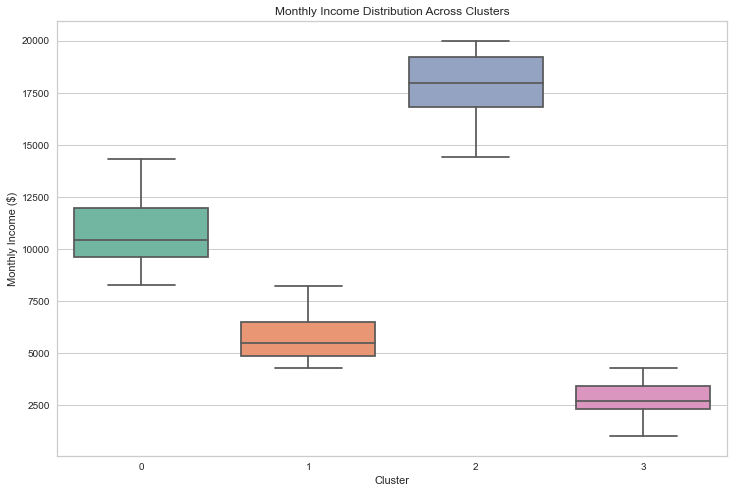

In [26]:
# Visualize the distribution of Monthly Income across clusters
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='MonthlyIncome', data=data, palette='Set2')
plt.title('Monthly Income Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Monthly Income ($)')
plt.show()

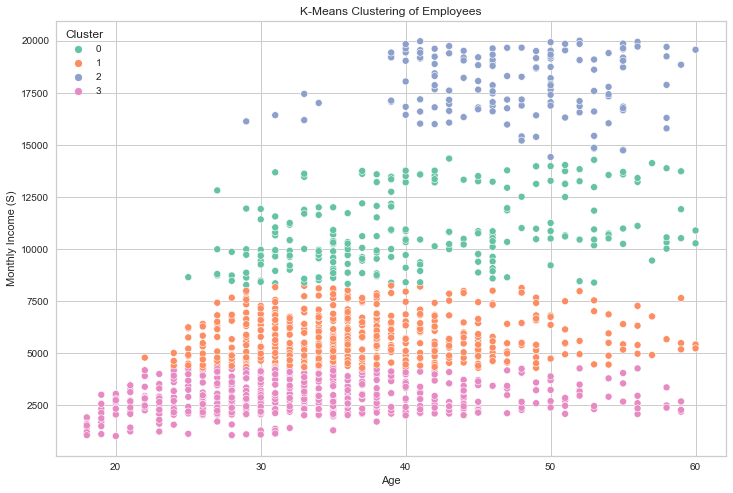

In [27]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='MonthlyIncome', data=data, hue='Cluster', palette='Set2')
plt.title('K-Means Clustering of Employees')
plt.xlabel('Age')
plt.ylabel('Monthly Income (S)')
plt.show()

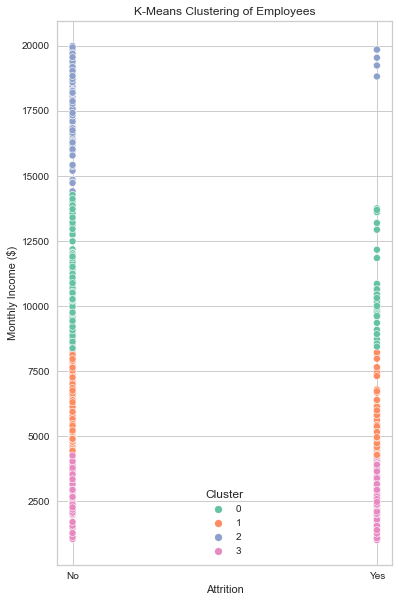

In [28]:
# Visualize the clusters
plt.figure(figsize=(6, 10))
sns.scatterplot(x='Attrition', y='MonthlyIncome', data=data, hue='Cluster', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('K-Means Clustering of Employees')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income ($)')
plt.show()

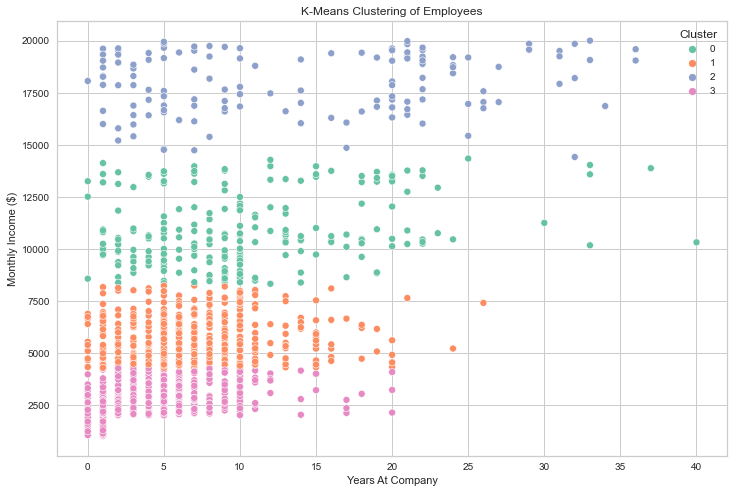

In [29]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data=data, hue='Cluster', palette='Set2')
plt.title('K-Means Clustering of Employees')
plt.xlabel('Years At Company')
plt.ylabel('Monthly Income ($)')
plt.show()

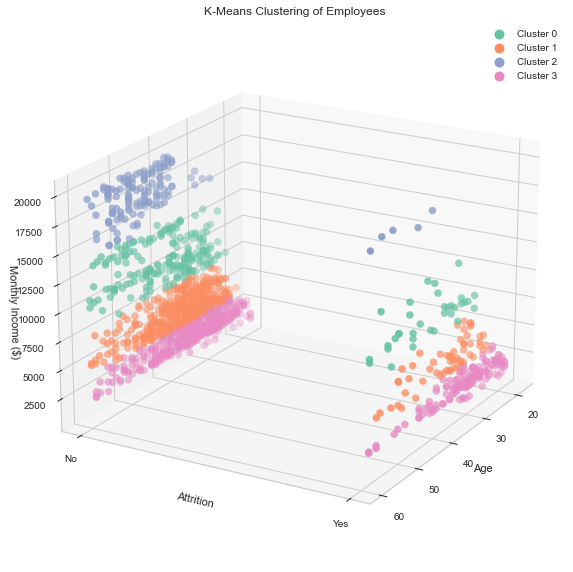

In [30]:
# Visualize the clusters in 3D
palette = sns.color_palette('Set2', n_colors=4)
cluster_colors = dict(zip(range(len(palette)), palette))
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter1 = ax.scatter(data['Age'], data['Attrition'], data['MonthlyIncome'], c=data['Cluster'].map(cluster_colors), s=50)
ax.set_title('K-Means Clustering of Employees')
ax.set_xlabel('Age')
ax.set_ylabel('Attrition')
ax.set_zlabel('Monthly Income ($)')
ax.set_yticks([0, 1])
ax.set_yticklabels(['No', 'Yes'])
ax.view_init(elev=20, azim=30)
legend_labels = [f'Cluster {label}' for label in cluster_colors.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, palette)]
ax.legend(handles=legend_handles)
plt.show()

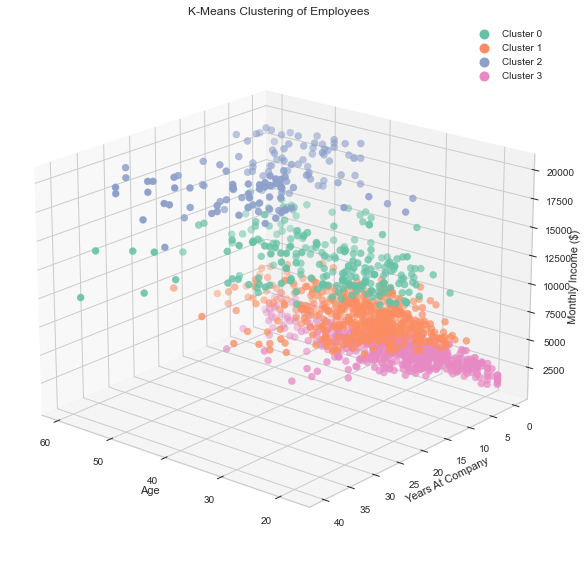

In [31]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter1 = ax.scatter(data['Age'], data['YearsAtCompany'], data['MonthlyIncome'], c=data['Cluster'].map(cluster_colors), s=50)
ax.set_title('K-Means Clustering of Employees')
ax.set_xlabel('Age')
ax.set_ylabel('Years At Company')
ax.set_zlabel('Monthly Income ($)')
ax.view_init(elev=20, azim=130)
ax.legend(handles=legend_handles)
plt.show()

## Cluster 2: High income and low attrition, represents a more senior and stable employees. 
## Cluster 3: Low income and high attrition, represents a younger and less experienced group. 
## This information can guide HR policies and initiatives to improve overall employee satisfaction and retention with specialized programs.

## For example:

- Attrition Intervention for Cluster 3:
     - Implement targeted interventions for employees in Cluster 3, who have the highest attrition rate and lowest years at the company. Conduct exit interviews to understand the reasons behind attrition and introduce measures such as career development programs, increased compensation, or improvements in work-life balance.